








#### Helpful sites
1) https://machinelearningmastery.com/how-to-one-hot-encode-sequence-data-in-python/ <br>
2) https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

# 1. Imports

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import numpy as np

# 2. Converting the tsv file to dataframe

In [2]:
df=pd.read_csv("mitofish.12S.Sep2021.tsv", sep='\t', header=0)

In [3]:
df[:50]


,Accession,Gene definition,taxid,Superkingdom,Phylum,Class,Order,Family,Genus,Species,Sequence,OrderID,FamilyID
0,AB006953,Carassius auratus langsdorfi mitochondrial DNA...,138676,Eukaryota,Chordata,Actinopteri,Cypriniformes,Cyprinidae,Carassius,Carassius langsdorfii,GATAACATCCCTATATGGTTTAGTACATAATATGCATAATATTACA...,32.0,109
1,AB015962,"Mustelus manazo mitochondrial DNA, complete se...",79736,Eukaryota,Chordata,Chondrichthyes,Carcharhiniformes,Triakidae,Mustelus,Mustelus manazo,GCTAGTGTAGCTTAATTTAAAGCATGGCACTGAAGATGCTAAGATG...,7.0,27
2,AB016274,"Sigmops gracilis mitochondrial genes, complete...",48457,Eukaryota,Chordata,Actinopteri,Stomiiformes,Gonostomatidae,Sigmops,Sigmops gracilis,GTTATCGTAGCTTACTTCTAAAGCCTAGCCCTGAAAATGCTAAGAT...,42.0,200
3,AB018224,Coryphaenoides armatus mitochondrial gene for ...,76798,Eukaryota,Chordata,Actinopteri,Gadiformes,Macrouridae,Coryphaenoides,Coryphaenoides armatus,CATAAAGGTTTGGTCCTGGCTTTACTATCAACTCTAACCTGATTTA...,51.0,243
4,AB018225,Coryphaenoides yaquinae mitochondrial gene for...,83387,Eukaryota,Chordata,Actinopteri,Gadiformes,Macrouridae,Coryphaenoides,Coryphaenoides yaquinae,CATAAAGGTTTGGTCCTAGCTTTACTATCAACTCTAACCTGATTTA...,51.0,243
5,AB018226,Coryphaenoides nasutus mitochondrial gene for ...,83388,Eukaryota,Chordata,Actinopteri,Gadiformes,Macrouridae,Coryphaenoides,Coryphaenoides nasutus,CACAAAGGTTTGGTCCTAGCTTTACTATCAACTCTAACCTAATTTA...,51.0,243
6,AB018227,Coryphaenoides longifilis mitochondrial gene f...,83389,Eukaryota,Chordata,Actinopteri,Gadiformes,Macrouridae,Coryphaenoides,Coryphaenoides longifilis,CACAAAGGTTTGGTCCTAGCTTTACTATCAACTCTAACCTAATTTA...,51.0,243
7,AB018228,Coryphaenoides acrolepis mitochondrial gene fo...,83390,Eukaryota,Chordata,Actinopteri,Gadiformes,Macrouridae,Coryphaenoides,Coryphaenoides acrolepis,CACAAAGGTTTGGTCCTAGCTTTACTATCAACTCTAACCTAATTTA...,51.0,243
8,AB018229,Coryphaenoides cinereus mitochondrial gene for...,83391,Eukaryota,Chordata,Actinopteri,Gadiformes,Macrouridae,Coryphaenoides,Coryphaenoides cinereus,CACAAAGGTTTGGTCCTAGCTTTACTATCAACTCTAACCTAATTTA...,51.0,243
9,AB018230,Coryphaenoides pectoralis mitochondrial gene f...,83392,Eukaryota,Chordata,Actinopteri,Gadiformes,Macrouridae,Albatrossia,Albatrossia pectoralis,CACAAAGGTTTGGTCCTAGCTTTACTATCAACTCTGACCTAATTTA...,51.0,243


# 3. Only Selecting the Sequence and Species from the Dataset

In [4]:
filter_df=df[['Family','Sequence']]

In [5]:
filter_df.head()

,Family,Sequence
0,Cyprinidae,GATAACATCCCTATATGGTTTAGTACATAATATGCATAATATTACA...
1,Triakidae,GCTAGTGTAGCTTAATTTAAAGCATGGCACTGAAGATGCTAAGATG...
2,Gonostomatidae,GTTATCGTAGCTTACTTCTAAAGCCTAGCCCTGAAAATGCTAAGAT...
3,Macrouridae,CATAAAGGTTTGGTCCTGGCTTTACTATCAACTCTAACCTGATTTA...
4,Macrouridae,CATAAAGGTTTGGTCCTAGCTTTACTATCAACTCTAACCTGATTTA...


### 3.1 Adding the Length of DNA sequence column to the Dataframe

In [6]:

filter_df['Sequence_length']= df['Sequence'].apply(lambda x: len(x))

In [7]:
filter_df.head()

,Family,Sequence,Sequence_length
0,Cyprinidae,GATAACATCCCTATATGGTTTAGTACATAATATGCATAATATTACA...,16578
1,Triakidae,GCTAGTGTAGCTTAATTTAAAGCATGGCACTGAAGATGCTAAGATG...,16707
2,Gonostomatidae,GTTATCGTAGCTTACTTCTAAAGCCTAGCCCTGAAAATGCTAAGAT...,16436
3,Macrouridae,CATAAAGGTTTGGTCCTGGCTTTACTATCAACTCTAACCTGATTTA...,826
4,Macrouridae,CATAAAGGTTTGGTCCTAGCTTTACTATCAACTCTAACCTGATTTA...,826


### 3.2 Checking the distribution of the DNA length

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000262C9B814C8>]],
      dtype=object)

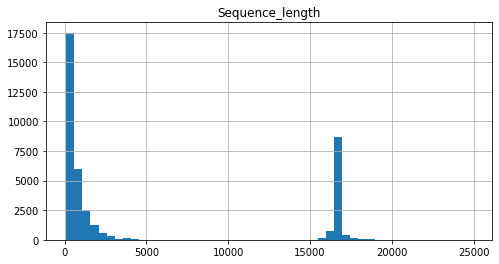

In [8]:
filter_df.hist(column="Sequence_length", figsize=(8,4), bins=50)

### 3.3 Total number of Family Classes

In [9]:
unique_classes = df['Family'].nunique()
print("The total number of samples are: ", len(filter_df))
print("The total number of unique classes are ", unique_classes)

The total number of samples are:  38699
The total number of unique classes are  541


In [10]:
filter_df['Family'].value_counts()

Gobiidae            2347
Clupeidae           1302
Cyprinidae          1284
Serranidae          1226
Labridae             922
                    ... 
Chaudhuriidae          1
Bathysauroididae       1
Lepidosirenidae        1
Echinorhinidae         1
Leptobramidae          1
Name: Family, Length: 541, dtype: int64

### 4) Translating DNA sequence into sequence of world


In [11]:
def getKmers(sequence, size=3):
    return [sequence[x:x+size].lower() for x in range(len(sequence) - size + 1)]

In [12]:

filter_df['words'] = filter_df.apply(lambda x: getKmers(x['Sequence']), axis=1)

In [13]:
filter_df.head()

,Family,Sequence,Sequence_length,words
0,Cyprinidae,GATAACATCCCTATATGGTTTAGTACATAATATGCATAATATTACA...,16578,"[gat, ata, taa, aac, aca, cat, atc, tcc, ccc, ..."
1,Triakidae,GCTAGTGTAGCTTAATTTAAAGCATGGCACTGAAGATGCTAAGATG...,16707,"[gct, cta, tag, agt, gtg, tgt, gta, tag, agc, ..."
2,Gonostomatidae,GTTATCGTAGCTTACTTCTAAAGCCTAGCCCTGAAAATGCTAAGAT...,16436,"[gtt, tta, tat, atc, tcg, cgt, gta, tag, agc, ..."
3,Macrouridae,CATAAAGGTTTGGTCCTGGCTTTACTATCAACTCTAACCTGATTTA...,826,"[cat, ata, taa, aaa, aag, agg, ggt, gtt, ttt, ..."
4,Macrouridae,CATAAAGGTTTGGTCCTAGCTTTACTATCAACTCTAACCTGATTTA...,826,"[cat, ata, taa, aaa, aag, agg, ggt, gtt, ttt, ..."


In [14]:
filter_df['sentence']=filter_df['words'].apply(lambda x: ' '.join(x))

In [15]:
filter_df.head()

,Family,Sequence,Sequence_length,words,sentence
0,Cyprinidae,GATAACATCCCTATATGGTTTAGTACATAATATGCATAATATTACA...,16578,"[gat, ata, taa, aac, aca, cat, atc, tcc, ccc, ...",gat ata taa aac aca cat atc tcc ccc cct cta ta...
1,Triakidae,GCTAGTGTAGCTTAATTTAAAGCATGGCACTGAAGATGCTAAGATG...,16707,"[gct, cta, tag, agt, gtg, tgt, gta, tag, agc, ...",gct cta tag agt gtg tgt gta tag agc gct ctt tt...
2,Gonostomatidae,GTTATCGTAGCTTACTTCTAAAGCCTAGCCCTGAAAATGCTAAGAT...,16436,"[gtt, tta, tat, atc, tcg, cgt, gta, tag, agc, ...",gtt tta tat atc tcg cgt gta tag agc gct ctt tt...
3,Macrouridae,CATAAAGGTTTGGTCCTGGCTTTACTATCAACTCTAACCTGATTTA...,826,"[cat, ata, taa, aaa, aag, agg, ggt, gtt, ttt, ...",cat ata taa aaa aag agg ggt gtt ttt ttg tgg gg...
4,Macrouridae,CATAAAGGTTTGGTCCTAGCTTTACTATCAACTCTAACCTGATTTA...,826,"[cat, ata, taa, aaa, aag, agg, ggt, gtt, ttt, ...",cat ata taa aaa aag agg ggt gtt ttt ttg tgg gg...


### 5) Convert a collection of text documents to a matrix of token counts.

In [16]:
corpus=list(filter_df['sentence'])

In [17]:
vectorizer=CountVectorizer()
X=vectorizer.fit_transform(corpus)

### 5.1 Visualizing all our feature array

In [18]:
features=vectorizer.get_feature_names()
print(features)

['aaa', 'aac', 'aag', 'aah', 'aak', 'aam', 'aan', 'aar', 'aas', 'aat', 'aaw', 'aay', 'aca', 'acb', 'acc', 'acg', 'ack', 'acm', 'acn', 'acr', 'acs', 'act', 'acw', 'acy', 'aga', 'agc', 'agd', 'agg', 'agh', 'agk', 'agm', 'agn', 'agr', 'ags', 'agt', 'agv', 'agw', 'agy', 'aht', 'aka', 'akc', 'akg', 'akr', 'aks', 'akt', 'ama', 'amc', 'amg', 'amm', 'amr', 'ams', 'amt', 'amw', 'amy', 'ana', 'anc', 'ang', 'anm', 'ann', 'anr', 'ant', 'any', 'ara', 'arc', 'arg', 'arm', 'arr', 'ars', 'art', 'arw', 'ary', 'asa', 'asc', 'asg', 'asr', 'ast', 'asy', 'ata', 'atb', 'atc', 'atg', 'ath', 'atk', 'atm', 'atn', 'atr', 'ats', 'att', 'atw', 'aty', 'awa', 'awc', 'awg', 'awk', 'awm', 'aws', 'awt', 'aww', 'awy', 'aya', 'ayc', 'ayg', 'ayk', 'ayn', 'ayr', 'ays', 'ayt', 'ayw', 'ayy', 'bga', 'bta', 'btt', 'byt', 'caa', 'cac', 'cag', 'cak', 'cam', 'can', 'car', 'cas', 'cat', 'caw', 'cay', 'cbt', 'cca', 'ccc', 'ccg', 'cck', 'ccm', 'ccn', 'ccr', 'ccs', 'cct', 'ccv', 'ccw', 'ccy', 'cda', 'cga', 'cgc', 'cgg', 'cgk', 'cgm'

In [19]:
print("The length of the feature is: ", len(features))

The length of the feature is:  850


## Second Technique
### 5.3 Creating a one-hot encoder for each and every feature array and mapping the DNA sequence with it

In [20]:
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(features)
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


### 5.4 Creating a python dictionary for mapping the feature with its respective one hot encoder

In [21]:
feature_encoder_mapper = dict(zip(features, onehot_encoded))

### 5.5 Mapping dna sequence with its respective one hot encoder

In [22]:
def dna_mapper(sequence,mapper):
    encoded_dna=[]
    for feature in sequence:
        encoded_dna.append(mapper[feature])
    return encoded_dna

In [23]:
my_seq=filter_df['words'][0]

In [24]:
encoded_seq=dna_mapper(my_seq,feature_encoder_mapper)

## 5.6 Only selecting sequence that have senquence length less than 3,000 

In [25]:
new_df=filter_df.loc[filter_df['Sequence_length'] <= 500]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000262D38A6488>]],
      dtype=object)

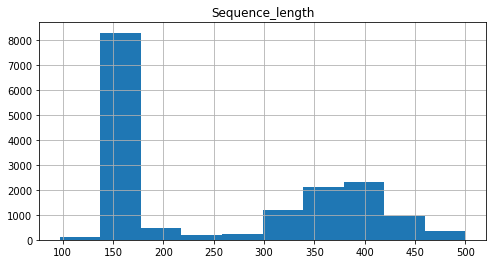

In [26]:
new_df.hist(column="Sequence_length", figsize=(8,4), bins=10)


In [27]:
new_df.head()

,Family,Sequence,Sequence_length,words,sentence
42,Diplophidae,CGCCCGGGAACTACAAGCGCCAGCTTAAAACCCAAAGGACTTGGCG...,330,"[cgc, gcc, ccc, ccg, cgg, ggg, gga, gaa, aac, ...",cgc gcc ccc ccg cgg ggg gga gaa aac act cta ta...
43,Gonostomatidae,CGCCAGGGGACTACAAGCGCCAGCTTAAAACCCAAAGGACTTGGCG...,331,"[cgc, gcc, cca, cag, agg, ggg, ggg, gga, gac, ...",cgc gcc cca cag agg ggg ggg gga gac act cta ta...
44,Gonostomatidae,CGCCAGGGGACTACAAGCGCCAGCTTAAAACCCAAAGGACTTGGCG...,334,"[cgc, gcc, cca, cag, agg, ggg, ggg, gga, gac, ...",cgc gcc cca cag agg ggg ggg gga gac act cta ta...
45,Gonostomatidae,CGCCCGGGGACTACAAGCGCCAGCTTCAAACCCAAAGGACTTGGCG...,335,"[cgc, gcc, ccc, ccg, cgg, ggg, ggg, gga, gac, ...",cgc gcc ccc ccg cgg ggg ggg gga gac act cta ta...
46,Gonostomatidae,CGCCCGGGGACTACAAGCGCCAGCTTCAAACCCAAAGGACTTGGCG...,334,"[cgc, gcc, ccc, ccg, cgg, ggg, ggg, gga, gac, ...",cgc gcc ccc ccg cgg ggg ggg gga gac act cta ta...


In [28]:
unique_classes = new_df['Family'].nunique()
print("The total number of samples are: ", len(new_df))
print("The total number of unique classes are ", unique_classes)

The total number of samples are:  16289
The total number of unique classes are  484


## Creating a array of size 850 that has all zeros 

In [29]:
zero_arr=np.zeros((850,), dtype=int)

## Replacing a zero array if the length of the sequence does not meet the maximum length 

In [30]:
max_seq_length=max(new_df.Sequence_length)

In [31]:
entire_dataset=[]

for i in range(len(new_df)):
    my_seq=new_df['words'].iloc[i]
    encoded_seq=dna_mapper(my_seq,feature_encoder_mapper)
    if len(encoded_seq)<max_seq_length:
        for i in range(len(encoded_seq),max_seq_length):
            encoded_seq.append(zero_arr)
    entire_dataset.append(encoded_seq)
            

## Implementing train test split

In [32]:
from sklearn.model_selection import train_test_split

X = entire_dataset
y = new_df['Family']

# Choose your test size to split between training and testing sets:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [33]:
type(X_train)

list

In [34]:
len(X_train)

12216

In [35]:
len(X_train[0])

500

In [36]:
len(X_train[0][0])

850

In [92]:
# Reshapng the array ot 4-D to meet the Keras API requirement
X_train=X_train.reshape(len(X_train),len(X_train[0]),len(X_train[0][0]),1)
X_test=X_test.reshape(len(X_test),len(X_test[0]),len(X_test[0][0]),1)
input_shape=(2805,850,1)

AttributeError: 'list' object has no attribute 'reshape'